<a href="https://colab.research.google.com/github/Eduarmma19/prueba_tecnica/blob/main/Prueba_tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba tecnica cientifico de datos junior 

## Contexto
OFFCORSS es una compañia dedicada al diseño, producción y comercialización de propuestas completas de vestuario y accesorios para bebes, niños y niñas. Se encuentra en busqueda de un cientifico de datos junior y plantea una prueba tecnica donde se debe realizar un EDA y predecir el número de unidades de acuerdo a unas caracteristicas dadas de sus campañas atraves de los años en su mercado de acción. 

## Objetivo de la prueba
1. Realizar un EDA ( Exploratory Data Analysis) 
2. Predecir el # de unidades dependiendo de las caracteristicas dadas 

### Plan EDA


1.   Entendiendo la base de datos (dimensión,columnas, # de NA, etc)
2.   Plantear preguntas acerca de los datos 



## Importación de datos

In [118]:
# Librerías a usar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
# Traer la base de datos desde el ordenador para el espacio de trabajo en colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [5]:
# El archivo de excel contiene la base de datos de los productos y en otra hoja información de las tiendas
# Base de datos de los productos y sus caracteristicas
df_productos = pd.read_excel("/content/BD Camisetas tiendas piloto analitica.xlsx", sheet_name= "Base")
# Esta es la segunda pagina del documento de excel que contiene información de las tiendas
df_tiendas = pd.read_excel("/content/BD Camisetas tiendas piloto analitica.xlsx", sheet_name= "Parametros Tiendas")


In [40]:
#Un pequeño vistaso de los datos de los productos 
df_productos.head()

Año  Semana Centro  ...  Mat:Concepto Diseño Unidades                      plu
0  2017       1   T013  ...     BASICOS CLASICOS        1  5133050 Rojo 18-1763 10
1  2017       1   T013  ...     BASICOS CLASICOS        2  5133196 Azul 19-4050 10
2  2017       1   T013  ...     BASICOS CLASICOS        2  5133196 Negro 19-4006 8
3  2017       1   T013  ...     BASICOS CLASICOS        1   5133197 Azul 19-3921 6
4  2017       1   T013  ...     BASICOS CLASICOS        1   5133197 Azul 19-3939 8

[5 rows x 9 columns]

In [8]:
# Un pequeño vistazo de los datos de las tiendas
df_tiendas.head()


Centro              Tienda    Ciudad Clima
0   T013    Tda Chipichape 2      Cali     C
1   T014       Tda El Tesoro  Medellin     M
2   T024       Tda San Diego  Medellin     M
3   T025    Tda SantaFe Bog.    Bogotá     F
4   T049  Tda Calima Bogota.    Bogotá     F

In [10]:
# Dimensiones de df_productos y df_tiendas respectivamente
print(df_productos.shape,df_tiendas.shape, sep = "\n")

(253331, 8)
(47, 4)


In [36]:
#Conociendo los tipos de variables de df_productos y df_tiendas respectivamente
print(df_productos.dtypes,df_tiendas.dtypes, sep= "\n\n")

Año                     int64
Año/Semana              int64
Centro                 object
Material                int64
Color                  object
Talla                  object
Mat:Concepto Diseño    object
Unidades                int64
plu                    object
dtype: object

Centro    object
Tienda    object
Ciudad    object
Clima     object
dtype: object


In [32]:
# Porcentaje de NA ( No tenemos NA dentro de la base de datos)
print(df_productos.isnull().sum()/df_productos.shape[0], df_tiendas.isnull().sum()/df_tiendas.shape[0], sep= "\n\n")


Año                    0.0
Año/Semana             0.0
Centro                 0.0
Material               0.0
Color                  0.0
Talla                  0.0
Mat:Concepto Diseño    0.0
Unidades               0.0
plu                    0.0
dtype: float64

Centro    0.0
Tienda    0.0
Ciudad    0.0
Clima     0.0
dtype: float64


In [29]:
# Creando la variable "plu" que indica la union de Material, Color y talla. Ejemplo : Una camisa azul de rayas de navidad talla 16
df_productos["plu"] = df_productos["Material"].astype(str) + " " + df_productos["Color"] + " " + df_productos["Talla"]

In [39]:
# La variable año/ mes esta en formato float y la parte entera indica la semana mientras que la decimal el año
# pero ya tengo la variable año , así que de esta variable solo me quedaré con la parte entera es decir las semanas y la renombro a "Semana"
df_productos["Año/Semana"] = df_productos["Año/Semana"].astype(int)
df_productos = df_productos.rename(columns= {"Año/Semana":"Semana"})


In [42]:
#Unir las bases de datos para algunas visualizaciones 
df_total = pd.merge(df_productos,df_tiendas, on = "Centro")
df_total.head()

Año  Semana Centro  ...            Tienda Ciudad Clima
0  2017       1   T013  ...  Tda Chipichape 2   Cali     C
1  2017       1   T013  ...  Tda Chipichape 2   Cali     C
2  2017       1   T013  ...  Tda Chipichape 2   Cali     C
3  2017       1   T013  ...  Tda Chipichape 2   Cali     C
4  2017       1   T013  ...  Tda Chipichape 2   Cali     C

[5 rows x 12 columns]

In [197]:
from time import sleep
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd

def get_coords(neight):
    geolocator = Nominatim(user_agent="Colombia")
    address = f'{neight},Colombia'
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else:
        latitude = longitude = np.NaN
    sleep(2)
    return pd.Series({"Latitud": latitude, "Longitude": longitude})

In [198]:
df = pd.DataFrame({"Neighbourhood": ('Cali', 'Medellin', 'Bogotá', 'San andres', 'Rionegro',
       'Villavicencio', 'Ipiales', 'Girardot', 'Apartado', 'Palmira',
       'Sincelejo', 'Cartago', 'Mosquera', 'Yopal', 'Chia', 'La ceja',
       'Soacha', 'Llanogrande'        )})
# Obtener las coordenadas de las ciudades donde la empresa tiene presencia 
lldata = pd.concat([df, df.Neighbourhood.apply(get_coords)], axis=1)
import folium
mi_mapa = folium.Map(location=(4.570868,-74.297333), zoom_start= 6.1)
for i in range(len(lldata)):
  x = lldata['Latitud'][i]
  y = lldata['Longitude'][i]
  z = lldata['Neighbourhood'][i]
  folium.Marker([x,y],popup=z).add_to(mi_mapa)

#Imprimir en el mapa las ubicaciones de las tiendas presentes en la base de datos
mi_mapa

In [ ]:
mi_mapa

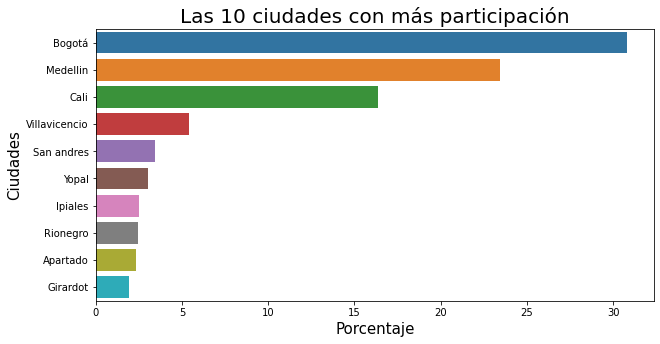

In [196]:
# ¿ Cuales son las 10 ciudades con más participación?
total = len(df_total["Ciudad"])
ciudad_conteo = df_total["Ciudad"].value_counts()
ciudad_conteo = ciudad_conteo[:10,]
plt.figure(figsize=(10,5))

ax1 =sns.barplot(x = ((ciudad_conteo.values/total)*100),y = ciudad_conteo.index, orient= "h")
plt.title("Las 10 ciudades con más participación",fontsize = 20)
plt.ylabel("Ciudades",fontsize = 15)
plt.xlabel("Porcentaje",fontsize = 15)
plt.show()

<function matplotlib.pyplot.show>

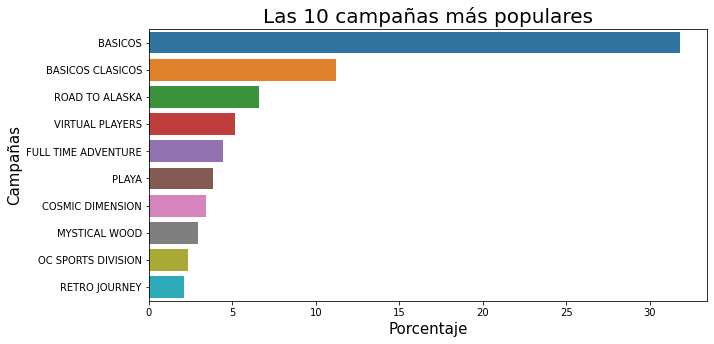

In [176]:
# Las 10 campañas más populares
campana_conteo = df_total['Mat:Concepto Diseño'].value_counts()
campana_conteo = campana_conteo[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x = (campana_conteo.values/total)*100, y = campana_conteo.index, orient= "h")
plt.title("Las 10 campañas más populares",fontsize = 20)
plt.ylabel('Campañas',fontsize = 15)
plt.xlabel('Porcentaje',fontsize = 15)
plt.show

In [ ]:
# ¿Cuales fueron las campañas lanzadas en cada año ? 

sns.catplot( y= "Mat:Concepto Diseño", col = "Año",data = df_productos, kind= "count", col_wrap = 2)

In [189]:
df_total["Ciudad"].unique()

array(['Cali', 'Medellin', 'Bogotá', 'San andres', 'Rionegro',
       'Villavicencio', 'Ipiales', 'Girardot', 'Apartado', 'Palmira',
       'Sincelejo', 'Cartago', 'Mosquera', 'Yopal', 'Chia', 'La ceja',
       'Soacha', 'Llanogrande'], dtype=object)